<a href="https://colab.research.google.com/github/Md-Arafat-Hossain-sami/Data-Mining-Bangla-Newspaper-Article-prediction-project/blob/main/Data_Mining_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv("/content/datacsv2.csv",encoding = 'utf-8')
data.head()

,author,category,category_bn,published_date,modification_date,title,tag,content
0,গাজীপুর প্রতিনিধি,bangladesh,বাংলাদেশ,"০৪ জুলাই ২০১৩, ২৩:২৬","০৪ জুলাই ২০১৩, ২৩:২৭","কালিয়াকৈরে টিফিন খেয়ে ৫০০ শ্রমিক অসুস্থ, বিক...",গাজীপুর,গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায়...
1,অনলাইন ডেস্ক,sports,খেলা,"০৪ জুলাই ২০১৩, ২৩:০৯","০৪ জুলাই ২০১৩, ২৩:১১",সেমিফাইনাল বাধাও পেরিয়ে গেলেন লিসিকি,টেনিস,এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যে...
2,নিজস্ব প্রতিবেদক,bangladesh,বাংলাদেশ,"০৪ জুলাই ২০১৩, ২২:২৫","০৪ জুলাই ২০১৩, ২৩:১২",সংসদে খালেদার অভিযোগের জবাব দিয়েছে ভারত,রাজনীতি,জাতীয় সংসদে বিএনপি চেয়ারপারসন ও বিরোধীদলীয় ...
3,অনলাইন ডেস্ক,technology,বিজ্ঞান ও প্রযুক্তি,"০৪ জুলাই ২০১৩, ২১:৩৭","০৪ জুলাই ২০১৩, ২১:৪৫",পাসওয়ার্ড ভুলে যান!,গবেষণা,সহজ পাসওয়ার্ডের কারণে অনলাইন অ্যাকাউন্ট সহজেই...
4,অনলাইন ডেস্ক,technology,বিজ্ঞান ও প্রযুক্তি,"০৪ জুলাই ২০১৩, ২১:৩৫","০৪ জুলাই ২০১৩, ২১:৩৭",চলে গেলেন মাউস উদ্ভাবক,কম্পিউটার,কম্পিউটার মাউসের উদ্ভাবক ডগলাস অ্যাঙ্গেলবার্ট ...


In [ ]:
data['category'].unique()

array(['bangladesh', 'sports', 'technology', 'entertainment',
       'entertainment,', 'international', 'economy'], dtype=object)

In [ ]:
data.shape

(59, 8)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


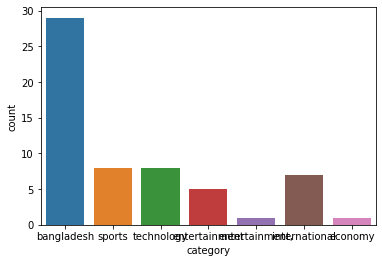

In [ ]:
sns.countplot(data.category)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data['tag'],
                                                    data['content'],
                                                    test_size = 10
                                                  )

In [ ]:
x_train.shape

(49,)

In [ ]:
x_test.shape

(10,)

In [ ]:
ngram_range = (1,2)
min_df = 1
max_df =50
max_features = 50

In [ ]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(x_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(x_test).toarray()
labels_test = y_test
print(features_test.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.43275465 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(10, 34)


In [ ]:
tfidf.fit_transform(x_train).toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.43275465, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
print(labels_train)

19    একক-মিশ্র অ্যালবামে অনেক গানই করেছেন বাপ্পা মজ...
24    নেইমার, নেইমার, নেইমার। এই মুহূর্তে এই ধ্বনিতে...
11    এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যে...
51    দেশের মাটিতে আন্তর্জাতিক ক্রিকেট নেই। ক্রিকেটা...
40    সপ্তাহের শেষ কার্যদিবসে আজ বৃহস্পতিবার প্রধান ...
5     গুগলের মোবাইল অপারেটিং সিস্টেম অ্যান্ড্রয়েডের...
18    ম্যাজিস্ট্রেটের মাধ্যমে সিলেটে সিএনজি স্টেশনের...
50    ঢাকার নৌপথে যাত্রী পরিবহনের লক্ষ্যে আবার ওয়াট...
52    মিসরে সামরিক হস্তক্ষেপের মধ্য দিয়ে প্রেসিডেন্...
32    আইনশৃঙ্খলা পরিস্থিতি নিয়ন্ত্রণে রাখতে অন্যবার...
2     জাতীয় সংসদে বিএনপি চেয়ারপারসন ও বিরোধীদলীয় ...
58                               খাদ্যর জন্য অজানা তথ্য
1     এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যে...
22    বিগহার্ট লাভার বয়’ সালমান খানের টানে নিজ দেশ ...
45    কারস্টেন ফ্লিপকেনসের বেঁচে থাকা নিয়েই নাকি সং...
47    সামরিক হস্তক্ষেপের মাধ্যমে মিসরের প্রেসিডেন্ট ...
17    ১১টি বিমা কোম্পানিকে লাইসেন্সের অনুমোদন দিয়েছ...
28    গাজীপুর সিটি করপোরেশন নির্বাচনে বিএনপির সে

In [ ]:
labels_train.shape

(49,)

In [ ]:
labels_test.shape

(10,)

In [ ]:
features_train.shape

(49, 34)

In [ ]:
features_test.shape

(10, 34)

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))



#model  = RandomForestClassifier(random_state=1)
#model.fit(features_train, labels_train)
#model_predictions = model.predict(features_test)
#print('Accuracy: ', accuracy_score(labels_test, model_predictions))
#print(classification_report(labels_test, model_predictions))

Accuracy 0.2
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
subset = data[data.category=="technology"]
text = subset.content.values
text = ' '.join(text)


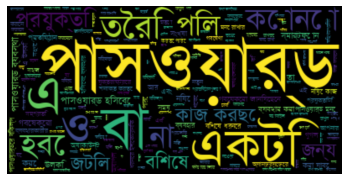

In [ ]:
!pip install python-bidi
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from bidi.algorithm import get_display

bidi_text = get_display(text)
#print(bidi_text)

rgx = r"[\u0980-\u09FF]+"
wordcloud = WordCloud(font_path='/content/SolaimanLipi_04_07_05.ttf', 
regexp=rgx).generate(bidi_text)

plt.imshow(wordcloud, interpolation='gaussian')
plt.axis("off")
plt.show()